In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
import plotly.express as px 

init_notebook_mode(connected=True)

sns.set_style('darkgrid')

### Data Reading 

In [4]:
data = pd.read_csv('C:\\Users\\vlad\\Desktop\\himalayan_db\\expeditions_data\\expeditions.csv')
data.head()

,peak_id,peak_name,nationality,year,season,host_cntr,other_cntrs,sponsor,leaders,rte_1_name,...,is_o2_sleeping,is_o2_medical,is_o2_used,is_o2_unkwn,had_o2,camp_sites,accidents,achievements,agency,members
0,ACHN,Aichyn,Japan,2015,Autumn,Nepal,NaN,Doshisha University Alpine Club Western Nepal ...,Hiroki Senda,NW side,...,0,0,0,0,0,"Smt(03,08/09)",NaN,NaN,Cosmo Treks,"01 Hiroki (Yuki) Senda (L)(S), Japan 02 Ms. ..."
1,ACHN,Aichyn,France,2015,Autumn,Nepal,NaN,Paulo Aichyn Expedition 2015,Paulo Grobel,N Ridge-W Ridge,...,0,0,0,0,0,Smt(25/09),NaN,NaN,Yeti Adventure,"01 Paul Marc (Paulo) Grobel (L)(S), France 02..."
2,ACHN,Aichyn,France,2018,Autumn,Nepal,NaN,French Aichyn Expeditions 2018,"Francois Damilano, Gregoire Lestienne",NaN,...,0,0,0,0,0,NaN,NaN,NaN,Himalayan Travellers Nepal,"01 Francois Damilano (L), France 02 Gregoire..."
3,AMAD,Ama Dablam,UK,1958,Autumn,Nepal,Italy,NaN,Alfred Gregory,SW Ridge,...,0,0,0,0,0,"BC,C1,C2,xxx(6000m)",NaN,NaN,NaN,"01 Alfred John (Alf) Gregory (L), UK 02 Rich..."
4,AMAD,Ama Dablam,UK,1959,Spring,Nepal,NaN,NaN,J. H. Emlyn Jones,N Ridge-NE Spur,...,0,0,0,0,1,"BC(17/04,5030m),C1(01/05,5440m),C2(05/05,5850m...",Fraser and Harris disappeared on way to summit...,NaN,NaN,"01 John Hubert Emlyn Jones (L), UK 02 George..."


**Unfortunately**, we don't have the rest prominent eight thousanders:
- K2, Broad Peak, Gasherbrum 1, Gasherbrum 2, Nanga Parbat (Karokoram)
- Shishapangma (China)

### Feature Description
- `peak_id`: Peak id 
- `peak_name`: Peak name
- `nationality`: The principle nationality of the expedition (main nationality)
- `year`: Expedition year
- `season`: Expedition season 
- `host_cntr`: Country from which ascent has begun 
- `other_cntrs`: Countires that took part in the expedition (members nationality)
- `sponsor`: Expedition sponsor
- `leaders`: Leader/leaders of the expedition
- `rte_1_name`: The first route name (similar for the rest features with the same prefix)
- `team_asc_1`: The times that a team ascended  for a certain route name (similar for the rest features with the same prefix)
- `is_disputed`: Success Disputed or Unverified
- `is_claim`: Expedition claims that summited, howevere without any evidence (probably a lie)
- `is_commercial_rte`: If the expedition was commercial
- `is_standard_rte`: If the route is standard (`S Col-SE Ridge`/`N Col-NE Ridge`/`N Col`)
- `other_smts`: Other peaks summited
- `approach`: Main expedition intermediate points to reach the mountain
- `bc_arrived`: Arrival date at the base camp 
- `bc_left`: Departure date from the base camp 
- `total_days`: Total number of days spent by the expedition
- `exp_result`: The result of the expedition
- `is_traverse`: If the traverse has been made (?)
- `is_ski_snowboard`: If the descent has been made using ski/snowboard
- `is_parapente`: If the descent has been made using parapente
- `term_note`: Summit termination details/results 
- `summit_day`: Day of the summit 
- `time`: Summit time 
- `max_elev_reached`: Max elevation reached by the expedition
- `summit_days`: Day of the summit according to total_days feature
- `total_mbrs`: Total number of expedition members
- `mbrs_summited`: Total number of expedition members that have summited
- `mbrs_deaths`: Total number of expedition members that died 
- `high_camps`: Number of high camps
- `hired_abc`: ?
- `hired_summits`: ?
- `hired_deaths`: ?
- `rope_fixed`: total rope length that has been fixed on the mountain/route
- `is_no_hired_abc`: ?
- `is_o2_not_used`:  If O2 has not been used
- `is_o2_climbing`: If O2 has been used during climbing
- `is_o2_descent`: If O2 has been used only on descent
- `is_o2_medical`: If O2 has been used for medical reasons 
- `is_o2_unkwn`: It's unknown wether O2 has been used or not
- `had_o2`: O2 has been taken but unused
- `camp_sites`: Expedition camps locations 
- `accidents`: Accident description
- `achievements`: Achievement description
- `agency`: Commercial agency name 
- `members`: Expedition members (name , `L - Leader`, `S - Summited`, `D - Died`)

### Interesting Question
- What are the top 25 mountains by ascents in the Himalaya?
    - What is success rate for these mountains?
    - What are top 3 countries that have tried climbing most on each of these peaks?
    - How many expeditions have been done in each year (yearly trend)?
    - What is a popular season to climb these mountains?
    - What is the popular host country for these mountains?
    - How many independet expeditions/attempts have been done?
    - Top 3 popular routes according to rte_1_name feature
    - How many days you have to spend to summit?
    - What is usually a weather window date? 
    - Summit time for a mountain 
    - How many Snowboard/Ski/Parapente attempts?
    - Average expedition Size 
    - Number of Deaths
    - Avg Summiters fraction of the Expedition
    - Team Fraction to Die

### Top 25 Most Popular Himalayan Mountains by Ascents
First, let's have a look at not only eight thousanders but lower mountains as well

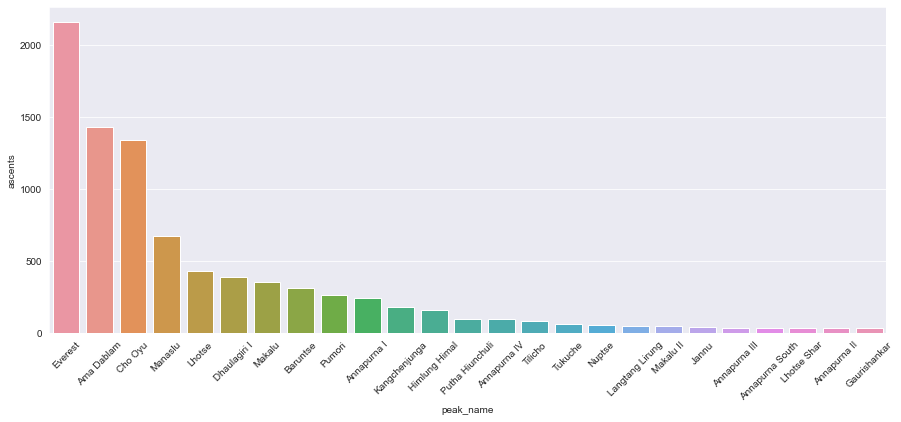

In [5]:
# Top 25 mountains by total ascents 
top_25_df = pd.DataFrame(data['peak_name'].value_counts().sort_values(ascending=False)[:25]).rename(columns={'peak_name': 'ascents'})
top_25_df.index.name = 'peak_name'
top_25_df = top_25_df.reset_index()

plt.figure(figsize=(15, 6))
sns.barplot(x=top_25_df['peak_name'], y=top_25_df['ascents'])
plt.xticks(rotation=45);

We have almost all eight thousanders in the Himalaya. Except for Shishapangma

### Success Rate 

In [6]:
top_25_mountains = top_25_df['peak_name'].values.tolist()
success_flags = ['Success', 'Success (Subpeak, ForeSmt)', 'Success (Claimed)']

In [7]:
suc_rate = data\
                .query("peak_name in @top_25_mountains and exp_result in @success_flags")\
                .groupby('peak_name')\
                .agg({'peak_id': 'count'})\
                .reset_index().rename(columns={'peak_id': 'suc_ascents'})

top_25_df = top_25_df.merge(suc_rate, how='inner', on='peak_name')
top_25_df['suc_rate'] = top_25_df['suc_ascents']/top_25_df['ascents']
top_25_df.sort_values('suc_rate', ascending=False)[['peak_name', 'suc_rate']].head()

,peak_name,suc_rate
1,Ama Dablam,0.689993
11,Himlung Himal,0.660494
2,Cho Oyu,0.633855
12,Putha Hiunchuli,0.622449
0,Everest,0.614385


If you want to climb a mountain in the Himlaya and want to summit, pick Ama Dablam or Cho Oyu (8k mountain)

### Top 3 Countries Participating Most 

In [8]:
# Itermediate DF
tmp_df = data\
    .query("peak_name in @top_25_mountains")\
    .groupby(['peak_name', 'nationality'], as_index=False)\
    .agg({'peak_id': 'count'}).rename(columns={'peak_id': 'ascents'})

top_countries_on_top_peaks = pd.DataFrame()
for peak in top_25_mountains:
    top_countries_on_top_peaks = top_countries_on_top_peaks.append(
        tmp_df.query('peak_name == @peak').sort_values('ascents', ascending=False)[:3]
    )
    
fig = px.bar(top_countries_on_top_peaks,
             x='peak_name',
             y='ascents',
             color='nationality',
             title='Top 3 Participating Countries',
             color_continuous_scale=px.colors.sequential.Bluyl) 
fig.show() 

### Number of Expeditions by Year

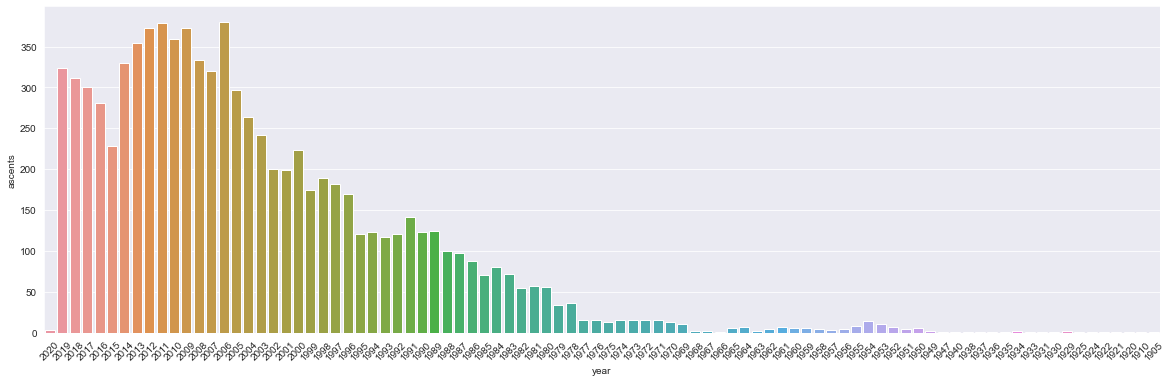

In [9]:
year_exped_trend = data\
    .query("peak_name in @top_25_mountains")\
    .groupby('year', as_index=False)\
    .agg({'peak_id': 'count'}).rename(columns={'peak_id':'ascents'})


plt.figure(figsize=(20, 6))
sns.barplot(x=year_exped_trend['year'],
            y=year_exped_trend['ascents'],
            order=year_exped_trend['year'].sort_values(ascending=False))
plt.xticks(rotation=45);

**Some insights:**
- 2020: Coronavirus
- 2015: Earthquake

### Popular Season to Climb

In [10]:
pop_season = data\
                .query("peak_name in @top_25_mountains")\
                .groupby(['peak_name', 'season'], as_index=False)\
                .agg({'peak_id': 'count'}).rename(columns={'peak_id': 'ascents'})

fig = px.bar(pop_season,
             x='peak_name',
             y='ascents',
             color='season',
             title='Top 3 Participating Countries',
             color_continuous_scale=px.colors.sequential.Bluyl) 
fig.show() 

### Popular Host Country

In [11]:
pop_host_cnt = data\
                .query("peak_name in @top_25_mountains")\
                .groupby(['peak_name', 'host_cntr'], as_index=False)\
                .agg({'peak_id': 'count'}).rename(columns={'peak_id': 'ascents'})

fig = px.bar(pop_host_cnt,
             x='peak_name',
             y='ascents',
             color='host_cntr',
             title='Top 3 Participating Countries',
             color_continuous_scale=px.colors.sequential.Bluyl) 
fig.show() 

### NUmber of Independet Expeditions/Attempts 
Climbing these mountains cost a lot and not many alpinist can afford it. Let's create a new binary feature `is_independent` and find out how many independent expeditions have been done

In [12]:
data['sponsor'] = data['sponsor'].fillna('unknown')
data['is_independent'] = data['sponsor'].apply(lambda x: 1 if 'independent' in x.lower() else 0)

In [13]:
ind_expeds = data\
    .query("peak_name in @top_25_mountains and is_independent == 1")\
    .groupby('peak_name', as_index=False)\
    .agg({'peak_id': 'count'}).rename(columns={'peak_id': 'ascents'})

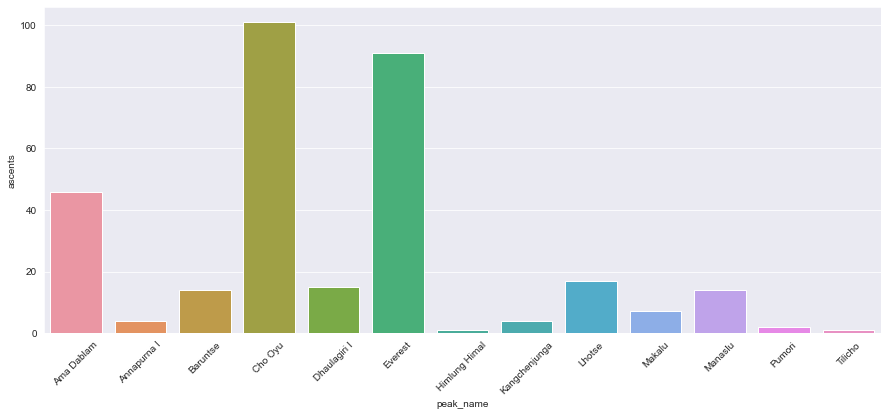

In [14]:
plt.figure(figsize=(15, 6))
sns.barplot(x=ind_expeds['peak_name'], y=ind_expeds['ascents'])
plt.xticks(rotation=45);

### Top 3 PopularRroutes 

In [15]:
# Itermediate DF
tmp_df = data\
    .query("peak_name in @top_25_mountains")\
    .groupby(['peak_name', 'rte_1_name'], as_index=False)\
    .agg({'peak_id': 'count'}).rename(columns={'peak_id': 'ascents'})

top_route = pd.DataFrame()
for peak in top_25_mountains:
    top_route = top_route.append(
        tmp_df.query('peak_name == @peak').sort_values('ascents', ascending=False)[:3]
    )
    
fig = px.bar(top_route,
             x='peak_name',
             y='ascents',
             color='rte_1_name',
             color_continuous_scale=px.colors.sequential.Bluyl) 
fig.show() 

### Median Days to Summit 

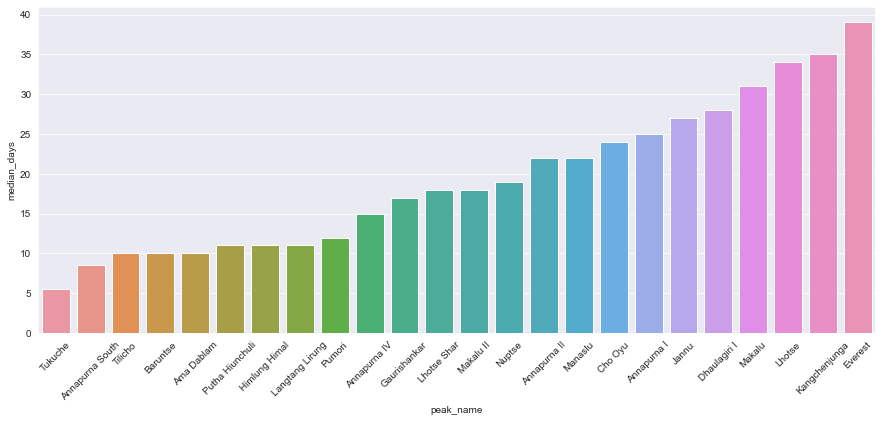

In [16]:
median_days_to_summit = data\
    .query("peak_name in @top_25_mountains")\
    .groupby('peak_name', as_index=False)\
    .agg({'total_days': 'median'}).rename(columns={'total_days': 'median_days'})\
    .query("median_days != 0")\
    .sort_values('median_days')


plt.figure(figsize=(15, 6))
sns.barplot(x=median_days_to_summit['peak_name'], y=median_days_to_summit['median_days'])
plt.xticks(rotation=45);

Interesting insight the higher the mountain the more days you have to spend on the expedition

### Median Wether Window date

In [21]:
# 1. Theare are missing values not much ~ 0.06 drop thmem
window_dates = pd.DataFrame()
for peak in top_25_mountains:
    peak_data = data.query("peak_name == @peak")['summit_day'].dropna()
    # 2. Convert to the same year
    peak_data = pd.to_datetime('2020' + '-' + pd.to_datetime(peak_data).dt.strftime('%m-%d'))
    # 3. Calculate the median date
    date_int_64 = pd.to_datetime(peak_data).values.astype(np.int64)
    median_date = pd.to_datetime(np.median(date_int_64))
    # 4. Conver to a format Day Month_name
    median_date = str(median_date.day) + ' ' + median_date.month_name()
    
    window_dates = window_dates.append(
        pd.DataFrame({'peak_name': peak, 'weather_window_date': median_date}, index=[0])
    )
    
    window_dates = window_dates.reset_index(drop=True)
    
window_dates.head()

,peak_name,weather_window_date
0,Everest,20 May
1,Ama Dablam,29 October
2,Cho Oyu,24 September
3,Manaslu,27 September
4,Lhotse,20 May


### Median Summit Time 

In [17]:
# Some time has been written incorrectly (e.g. 61:5), find them and drop
def find_wrong_time_indx(series):
    indx_to_drop = []
    for indx, value in series.items():
        try:
             pd.to_datetime(value)
        except:
            indx_to_drop.append(indx)
    return indx_to_drop

In [18]:
median_time = pd.DataFrame()
for peak in top_25_mountains:
    peak_data = data.query("peak_name == @peak")['time'].dropna()
    wrong_time_indxs = find_wrong_time_indx(peak_data)
    peak_data = peak_data[~peak_data.index.isin(wrong_time_indxs)]
    
    date_int_64 = pd.to_datetime(peak_data).values.astype(np.int64)
    res = pd.to_datetime(np.median(date_int_64)).time()

    median_time = median_time.append(
        pd.DataFrame({'peak_name': peak, 'summit_time': res}, index=[0])
    )
    median_time = median_time.reset_index(drop=True)

In [19]:
median_time.head()

,peak_name,summit_time
0,Everest,08:30:00
1,Ama Dablam,11:25:00
2,Cho Oyu,10:30:00
3,Manaslu,10:00:00
4,Lhotse,10:30:00


### Snowboard/Ski/Parapente Attempts

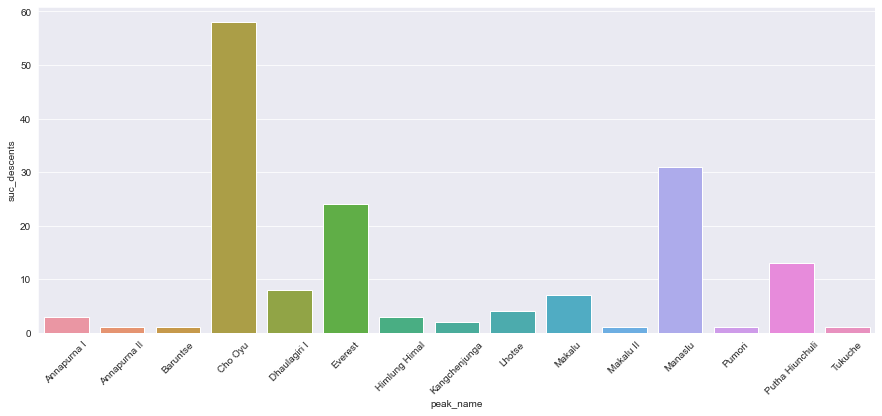

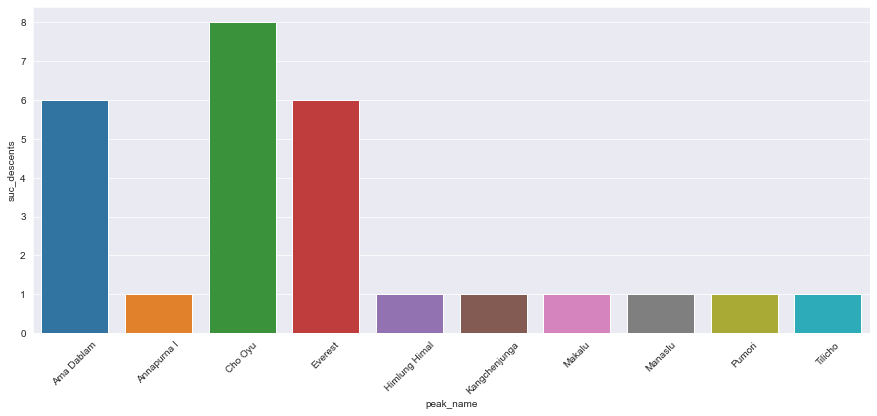

In [22]:
# Snowboard/Ski/Parapente attempts on these peaks 
ski_snowboard_data = data\
    .query("peak_name in @top_25_mountains and is_ski_snowboard == 1")\
    .groupby('peak_name', as_index=False)\
    .agg({'peak_id': 'count'}).rename(columns={'peak_id': 'suc_descents'})


plt.figure(figsize=(15, 6))
sns.barplot(x=ski_snowboard_data['peak_name'],
            y=ski_snowboard_data['suc_descents'])
plt.xticks(rotation=45);


parapente_data = data\
    .query("peak_name in @top_25_mountains and is_parapente == 1")\
    .groupby('peak_name', as_index=False)\
    .agg({'peak_id': 'count'}).rename(columns={'peak_id': 'suc_descents'})


plt.figure(figsize=(15, 6))
sns.barplot(x=parapente_data['peak_name'],
            y=parapente_data['suc_descents'])
plt.xticks(rotation=45);

### Average expedition Size 

In [23]:
avg_exped_size = data\
    .query("peak_name in @top_25_mountains")\
    .groupby('peak_name', as_index=False)\
    .agg({'total_mbrs': 'mean'}).rename(columns={'total_mbrs': 'avg_exped_size'})
    
    
avg_exped_size['avg_exped_size'] = avg_exped_size['avg_exped_size'].round()
avg_exped_size = avg_exped_size.sort_values('avg_exped_size', ascending=False)
avg_exped_size.head()

,peak_name,avg_exped_size
24,Tukuche,7.0
23,Tilicho,7.0
3,Annapurna III,7.0
4,Annapurna IV,7.0
9,Everest,7.0


### Number of Deaths

In [25]:
# Deaths on these mountains 
deaths = data\
    .query("peak_name in @top_25_mountains")\
    .groupby('peak_name', as_index=False)\
    .agg({'mbrs_deaths': 'sum'}).rename(columns={'mbrs_deaths': 'total_deaths'})\
    .sort_values('total_deaths', ascending=False)

deaths.head()

,peak_name,total_deaths
9,Everest,185
19,Manaslu,70
8,Dhaulagiri I,63
1,Annapurna I,54
7,Cho Oyu,42


### Avg Summiters Fraction of the Expedition

In [26]:
### Avg Summiters size in the expedition 
data['mbrs_summiters_frac'] = data['mbrs_summited']/data['total_mbrs']

sum_frac = data\
    .query("peak_name in @top_25_mountains")\
    .groupby('peak_name', as_index=False)\
    .agg({'mbrs_summiters_frac': 'mean'}).rename(columns={'mbrs_summiters_frac': 'mbrs_summiters_frac'})\
    .sort_values('mbrs_summiters_frac', ascending=False)

sum_frac.head()

,peak_name,mbrs_summiters_frac
0,Ama Dablam,0.495037
9,Everest,0.389321
7,Cho Oyu,0.384996
15,Lhotse,0.378890
22,Putha Hiunchuli,0.372666


### Team Fraction to Die 

In [27]:
# Portion of team to die 
data['mbrs_die_frac'] = data['mbrs_deaths']/data['total_mbrs']

deaths_frac = data\
    .query("peak_name in @top_25_mountains")\
    .groupby('peak_name', as_index=False)\
    .agg({'mbrs_die_frac': 'mean'})\
    .sort_values('mbrs_die_frac', ascending=False)

deaths_frac.head()

,peak_name,mbrs_die_frac
18,Makalu II,inf
14,Langtang Lirung,0.048150
8,Dhaulagiri I,0.032960
1,Annapurna I,0.030889
13,Kangchenjunga,0.029499


To be continued 